# STEP 1 . IMPORTING THE LIBRARIES


In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime as dt
%matplotlib inline
from pandas.plotting import table
import warnings
warnings.filterwarnings('ignore')

# STEP 2. CREATING & READING THE DATA


In [2]:
# load the dataset
Data = pd.read_csv("TSLA.csv")

In [3]:
Data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


# STEP 3 . PRINT DATATYPES , DIMENSION AND DESCRIOTIVE STATISTICS. 


In [4]:
Data.shape

(2416, 7)

In [5]:
Data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
# convert the date column to datetime object
Data['Date']=pd.to_datetime(Data['Date'])

In [7]:
Data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [8]:
# disable the scientific notation to understand figures better 
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [9]:
Data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.00,25.00,17.54,23.89,23.89,18766300
1,2010-06-30,25.79,30.42,23.30,23.83,23.83,17187100
2,2010-07-01,25.00,25.92,20.27,21.96,21.96,8218800
3,2010-07-02,23.00,23.10,18.71,19.20,19.20,5139800
4,2010-07-06,20.00,20.00,15.83,16.11,16.11,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.49,576.81,558.08,566.90,566.90,11788500
2412,2020-01-29,575.69,589.80,567.43,580.99,580.99,17801500
2413,2020-01-30,632.42,650.88,618.00,640.81,640.81,29005700
2414,2020-01-31,640.00,653.00,632.52,650.57,650.57,15719300


In [10]:
Data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.00,2416.00,2416.00,2416.00,2416.00,2416.00
mean,186.27,189.58,182.92,186.40,186.40,5572721.69
std,118.74,120.89,116.86,119.14,119.14,4987809.15
min,16.14,16.63,14.98,15.80,15.80,118500.00
25%,34.34,34.90,33.59,34.40,34.40,1899275.00
50%,213.04,216.75,208.87,212.96,212.96,4578400.00
75%,266.45,270.93,262.10,266.77,266.77,7361150.00
max,673.69,786.14,673.52,780.00,780.00,47065000.00


# STEP 4. CHECK IF THERE ARE MISSING VALUES. IF YES, HANDLE THEM.


In [11]:
Data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
# to check if there are any special characters in place of values 
for i in Data.columns:
    print({i:Data[i].unique()})

{'Date': array(['2010-06-29T00:00:00.000000000', '2010-06-30T00:00:00.000000000',
       '2010-07-01T00:00:00.000000000', ...,
       '2020-01-30T00:00:00.000000000', '2020-01-31T00:00:00.000000000',
       '2020-02-03T00:00:00.000000000'], dtype='datetime64[ns]')}
{'Open': array([ 19.      ,  25.790001,  25.      , ..., 632.419983, 640.      ,
       673.690002])}
{'High': array([ 25.      ,  30.42    ,  25.92    , ..., 650.880005, 653.      ,
       786.140015])}
{'Low': array([ 17.540001,  23.299999,  20.27    , ..., 618.      , 632.52002 ,
       673.52002 ])}
{'Close': array([ 23.889999,  23.83    ,  21.959999, ..., 640.809998, 650.570007,
       780.      ])}
{'Adj Close': array([ 23.889999,  23.83    ,  21.959999, ..., 640.809998, 650.570007,
       780.      ])}
{'Volume': array([18766300, 17187100,  8218800, ..., 29005700, 15719300, 47065000],
      dtype=int64)}


# STEP 5 . TO VISUALIZE THE GIVEN DATA INTO GRAPHICAL FORMAT.

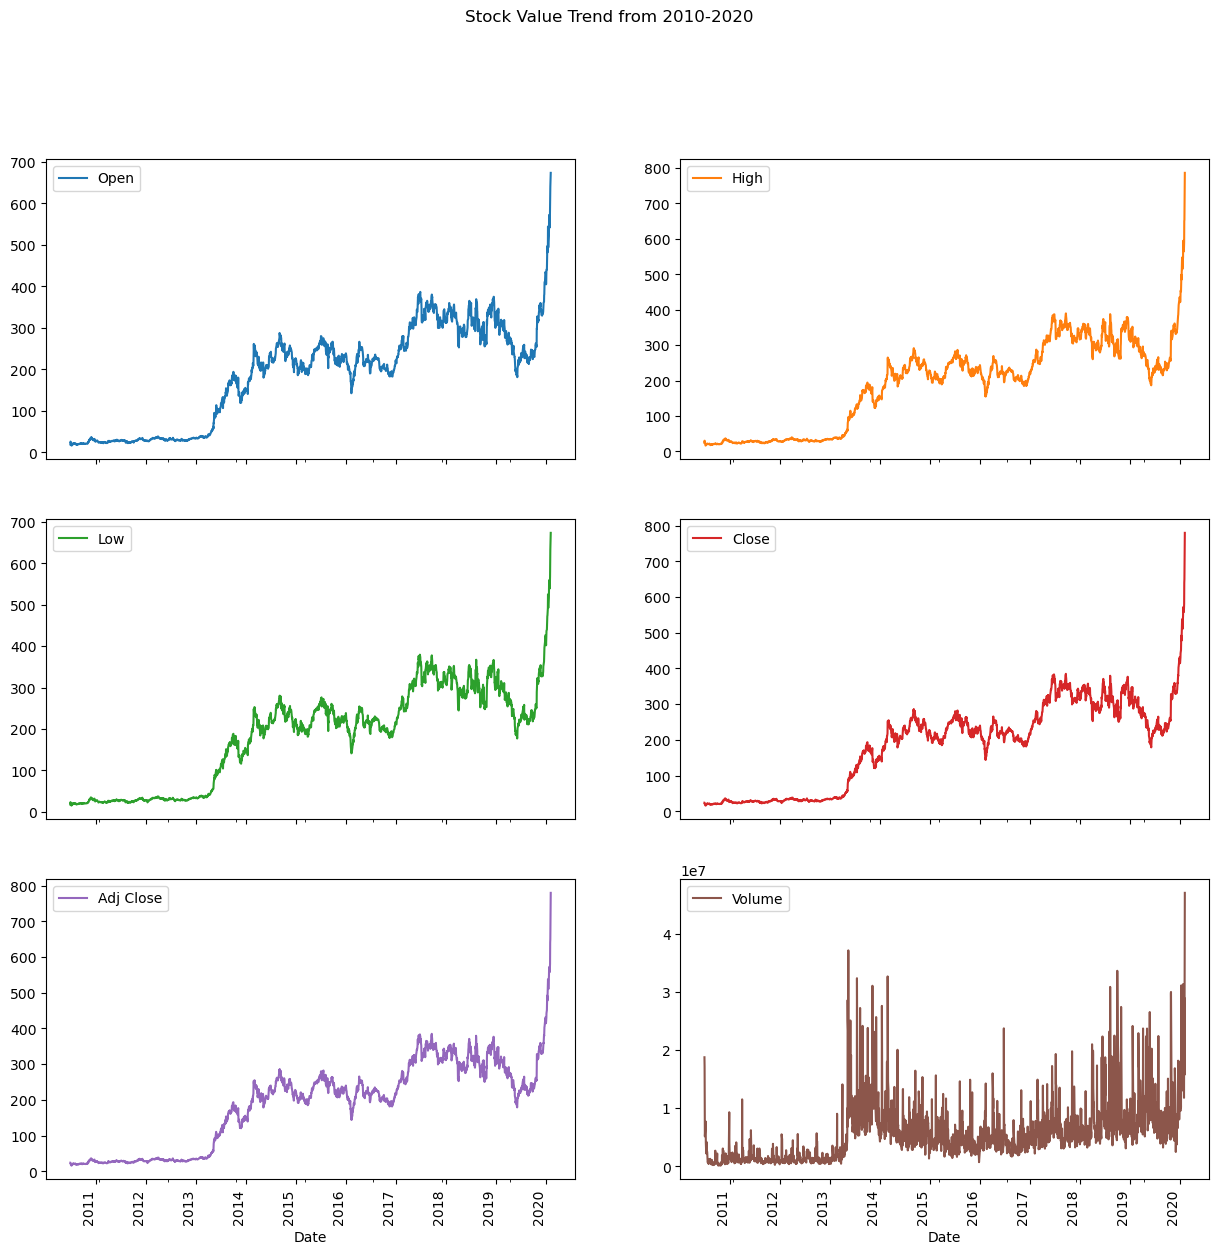

In [13]:
# creating a list for numerical columns that are to be visualized
Column_List=['Open','High','Low','Close','Adj Close','Volume']

Data.plot(x="Date", y= Column_List,subplots = True,layout=(3,2),
         figsize= (15,15),
         title="Stock Value Trend from 2010-2020",rot=90);


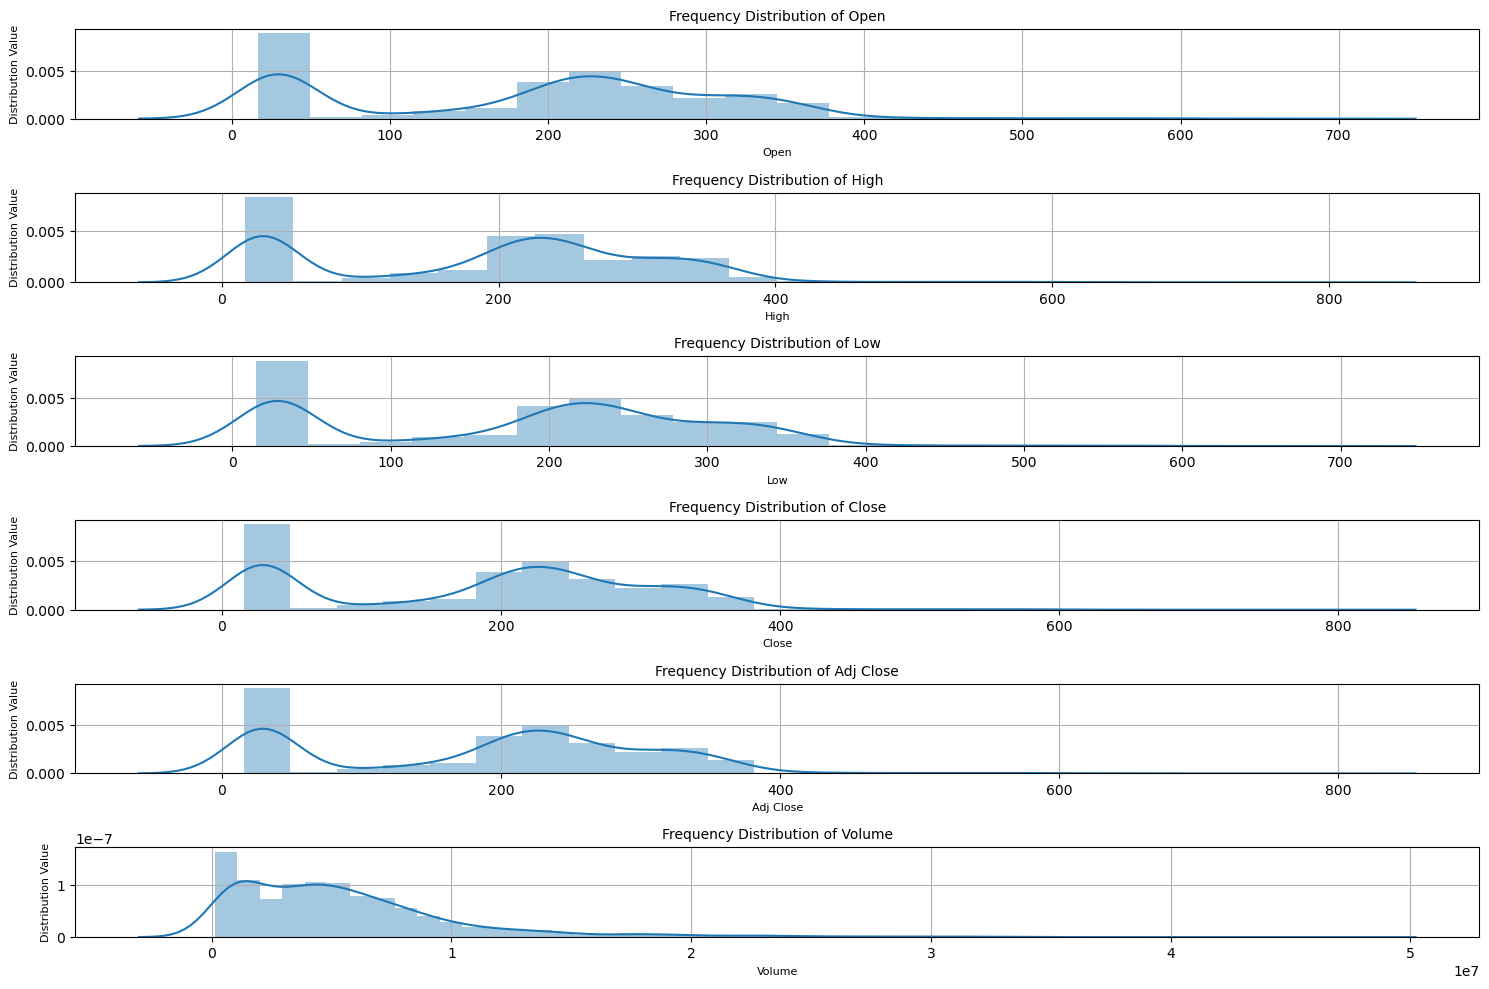

In [14]:
# Use the column_list : list initionalized above in the following steps
fig, ax = plt.subplots(len(Column_List),figsize = (15,10))

for i,col_list in enumerate(Column_List):
    sns.distplot(Data[col_list],hist=True, ax= ax[i])
    ax[i].set_title ("Frequency Distribution of" + " " + col_list, fontsize=10)
    ax[i].set_xlabel (col_list, fontsize=8)
    ax[i].set_ylabel ('Distribution Value', fontsize = 8)
    fig.tight_layout (pad = 1.1)
    # this will help to provide spaces btw the plots
    ax[i].grid('on') # use to enable the  grip lines in the plots.

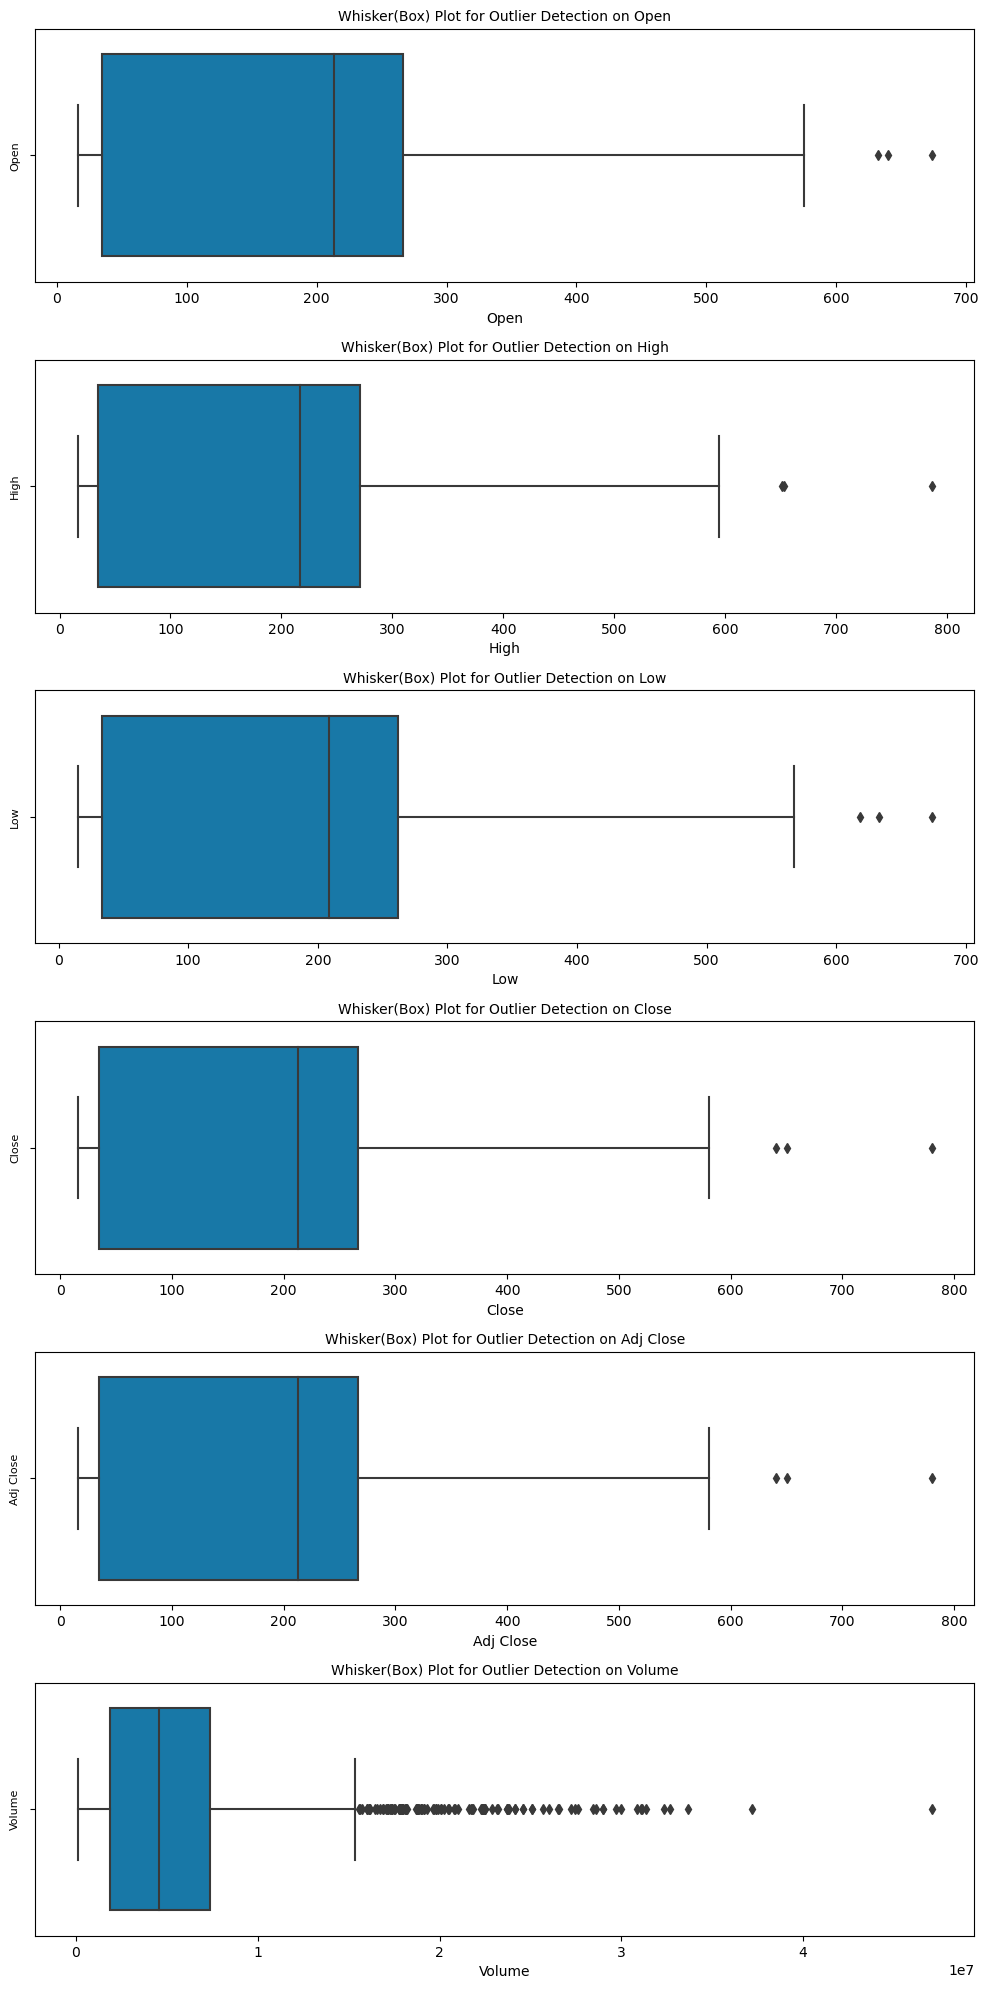

In [15]:
# generating whisker plots to detect the presence of any outline 
fig, ax = plt.subplots(len(Column_List),figsize = (10,20))
    
for i,col_list in enumerate(Column_List):
    sns.boxplot(Data[col_list], ax= ax[i],palette='winter', orient = 'h')
    ax[i].set_title ("Whisker(Box) Plot for Outlier Detection on" + " " + col_list, fontsize=10)
    ax[i].set_ylabel (col_list, fontsize=8)
    fig.tight_layout (pad = 1.1)
    
    


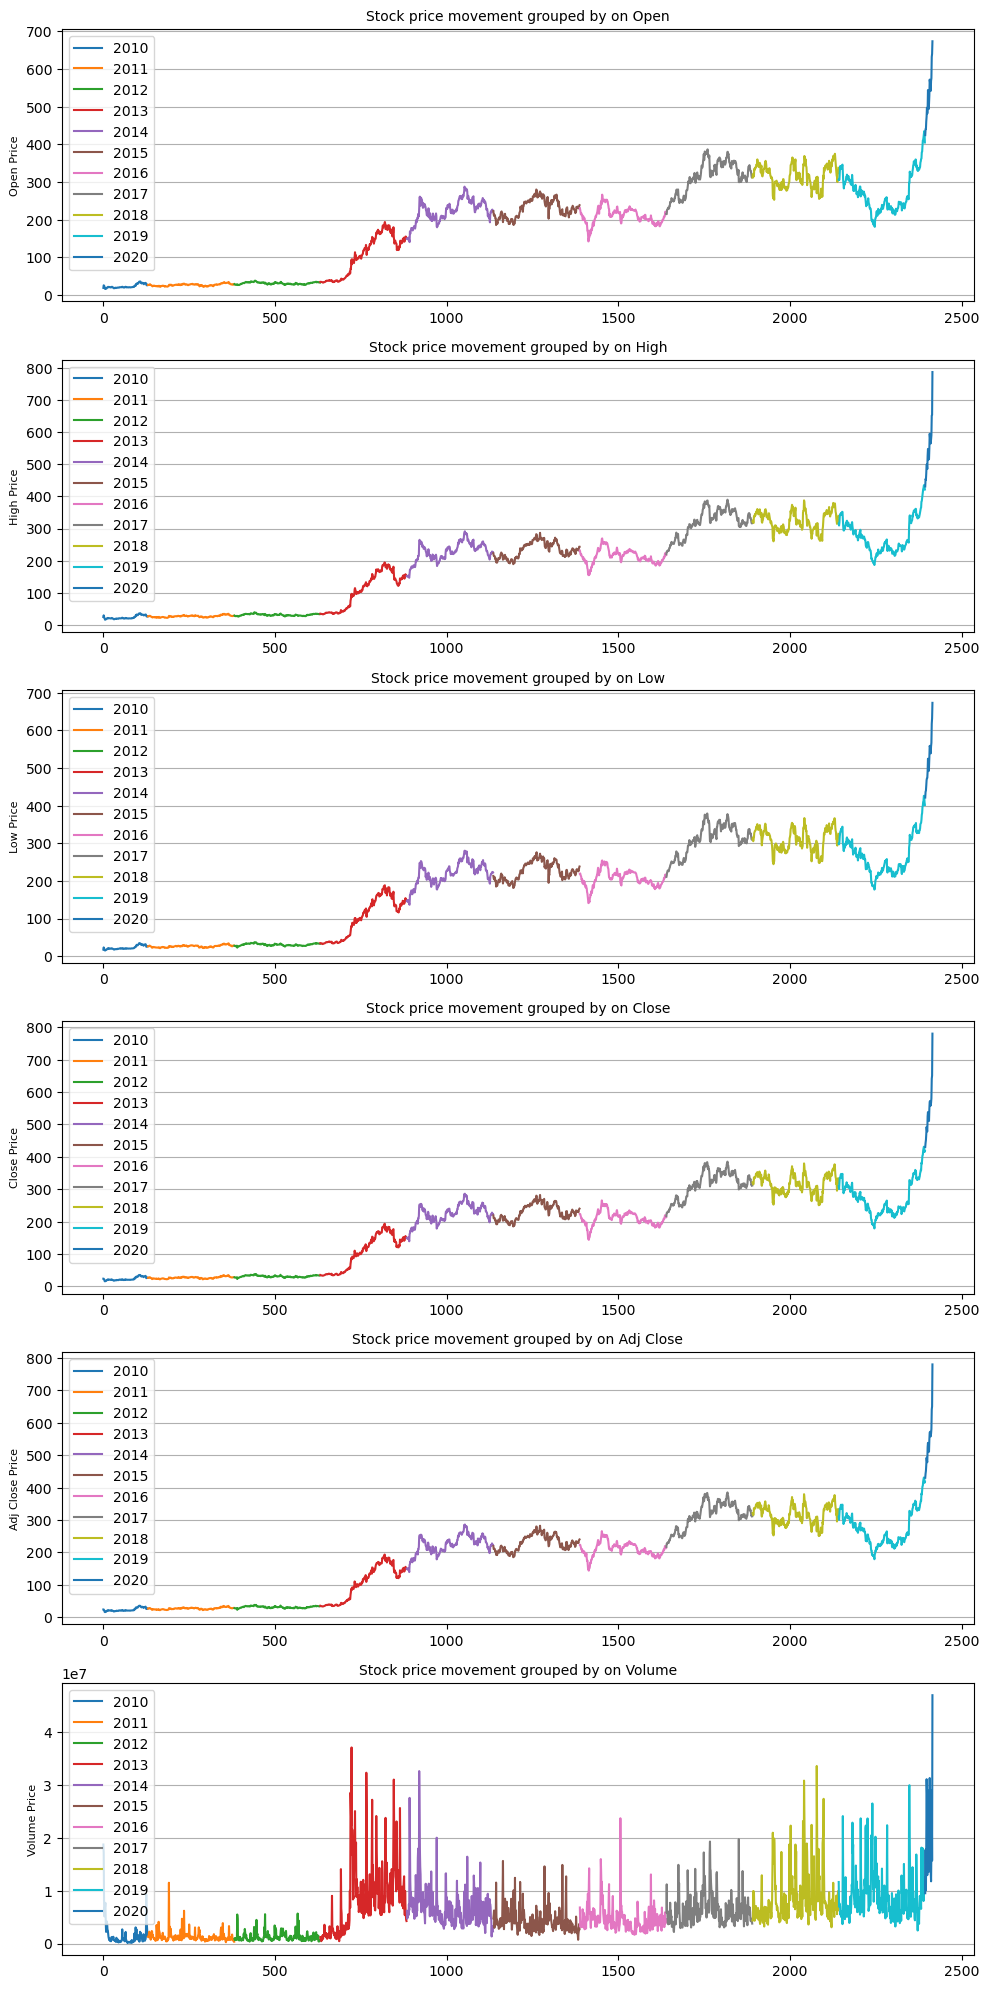

In [16]:
# since the data is a time series data, we should be able to predict the future


# decomposing the time series year-wise and month-wise to analyse it further
Data['Year']= Data['Date'].dt.year
Data['Month']= Data['Date'].dt.month
Data['WeekDay']= Data['Date'].dt.weekday

# firstly plotting the data year-wise to see the duration of when it hiked and dipped

fig, ax=plt.subplots(len(Column_List),figsize=(10,20))

for i, col_list in enumerate(Column_List):
    Data.groupby('Year')[col_list].plot(ax=ax[i], legend=True)
    ax[i].set_title('Stock price movement grouped by on'+" "+col_list,fontsize=10)
    ax[i].set_ylabel(col_list +" "+"Price",fontsize=8)
    fig.tight_layout(pad=1.1)
    ax[i].yaxis.grid(True)
    

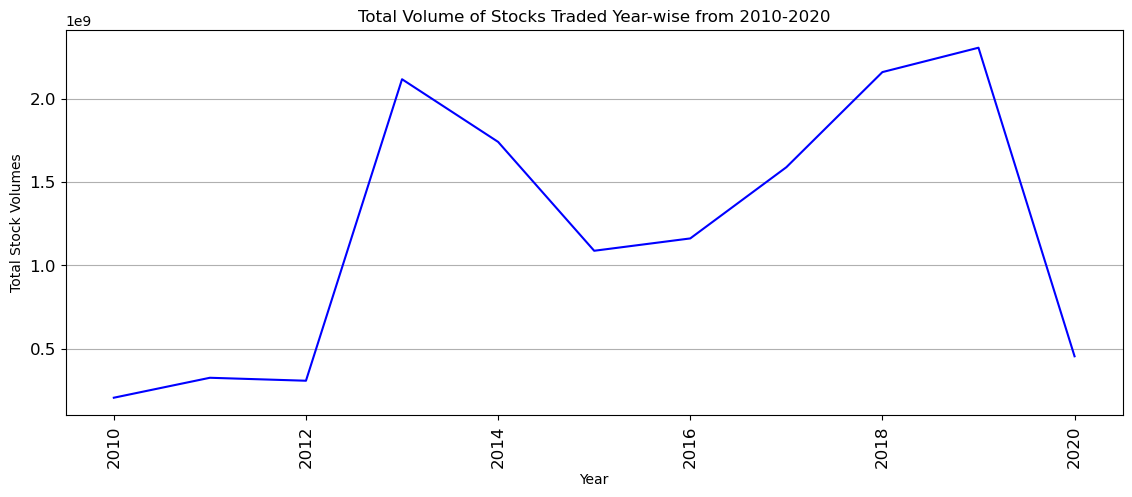

In [22]:
# Visualzing only the total volume of stocks traded grouped year-wise
check = Data.groupby('Year')['Volume'].sum()
plt.figure(figsize= (30,5))
ax1 = plt.subplot(121)
check.plot(y="Volume",legend = False, fontsize= 12,
          title = 'Total Volume of Stocks Traded Year-wise from 2010-2020',
          rot=90, color='blue')
ax1.set_ylabel('Total Stock Volumes')
ax1.yaxis.grid(True)

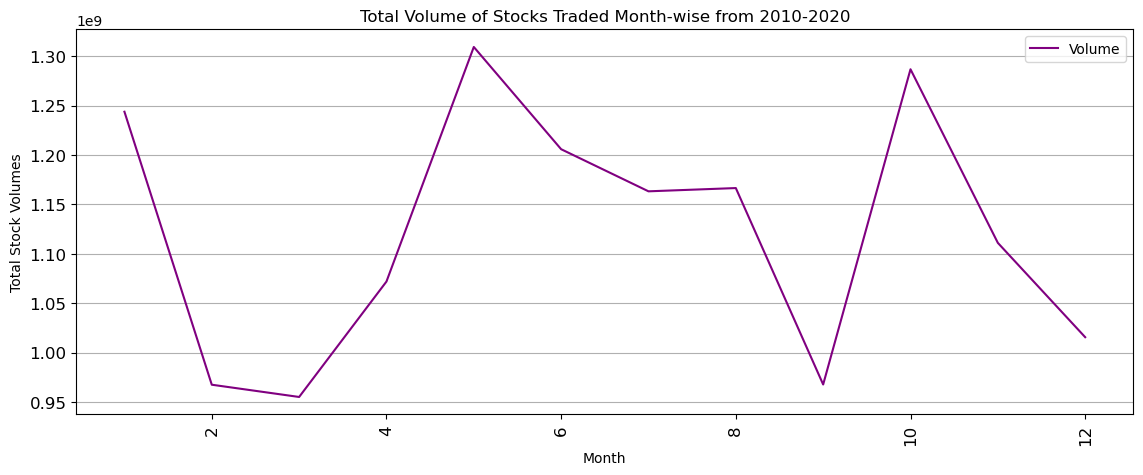

In [26]:
check = Data.groupby('Month')['Volume'].sum()
plt.figure(figsize= (30,5))
ax1 = plt.subplot(121)
check.plot(y="Volume",legend = True, fontsize= 12,
          title = 'Total Volume of Stocks Traded Month-wise from 2010-2020',
          rot=90, color='purple')
ax1.set_ylabel('Total Stock Volumes')
ax1.yaxis.grid(True)

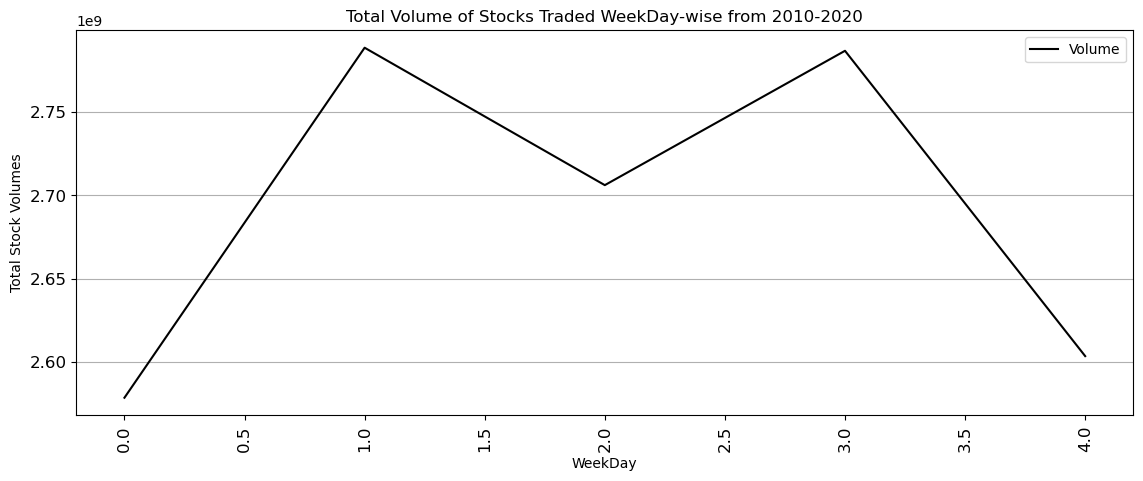

In [27]:
check = Data.groupby('WeekDay')['Volume'].sum()
plt.figure(figsize= (30,5))
ax1 = plt.subplot(121)
check.plot(y="Volume",legend = True, fontsize= 12,
          title = 'Total Volume of Stocks Traded WeekDay-wise from 2010-2020',
          rot=90, color='black')
ax1.set_ylabel('Total Stock Volumes')
ax1.yaxis.grid(True)

In [28]:
# analysing  it based on year
for i, col_list in enumerate(Column_List):
    var = Data.groupby('Year')[col_list].sum()
    
# converting the variable into a pandas dataframe
var = pd.DataFrame(var)

In [29]:
var

,Volume
Year,
2010,205369100
2011,325235100
2012,307449000
2013,2118745900
2014,1742321300
2015,1088217800
2016,1162361700
2017,1590031400
2018,2161638800


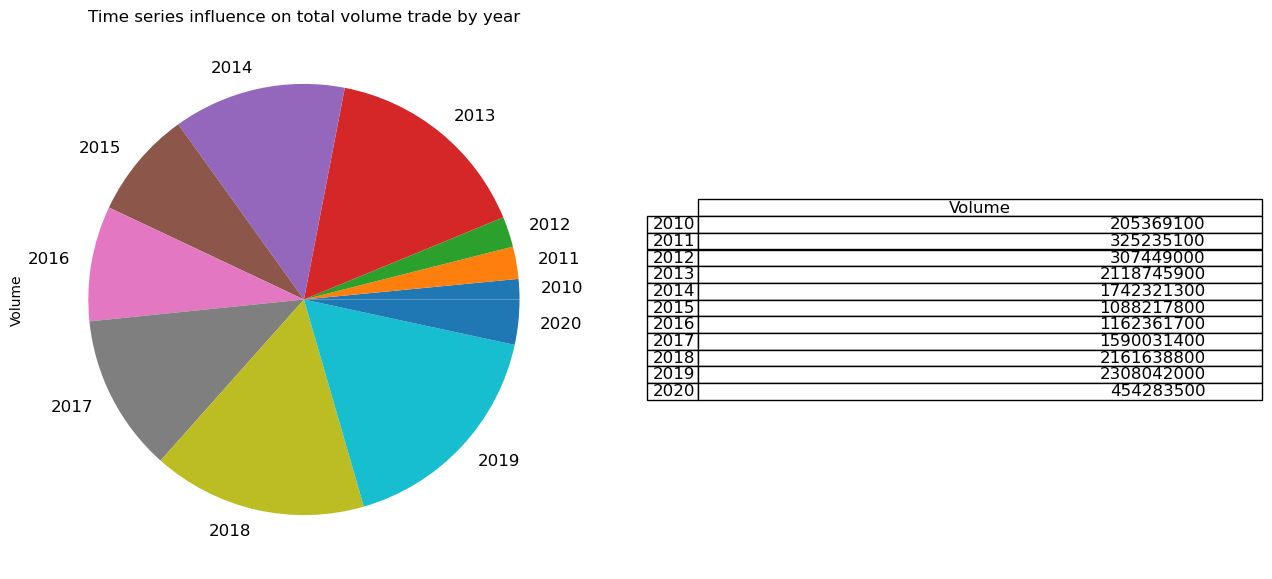

In [35]:
# plotting tounderstand the trend using pie charts
plt.figure(figsize=(16,7))
ax1 = plt.subplot(121)
var.plot(kind = 'pie',y = "Volume",legend = False,fontsize = 12,
        title ='Time series influence on total volume trade by year',
        ax = ax1)
# plotting the table to identitfy numbers
ax2 = plt.subplot(122)
plt.axis('off')# since we are plotting the table 
tb1 = table(ax2, var,loc='center')
tb1.set_fontsize(12)
plt.show()

In [40]:
# analysing  it based on year
for i, col_list in enumerate(Column_List):
    var = Data.groupby('Month')[col_list].sum()
    
# converting the variable into a pandas dataframe
var = pd.DataFrame(var)

In [41]:
var

,Volume
Month,
1,1243700900
2,967475600
3,955076800
4,1071875300
5,1309223600
6,1205766600
7,1163162500
8,1166461300
9,967704800


In [42]:
# analysing  it based on year
for i, col_list in enumerate(Column_List):
    var = Data.groupby('WeekDay')[col_list].sum()
    
# converting the variable into a pandas dataframe
var = pd.DataFrame(var)

In [43]:
var

,Volume
WeekDay,
0,2578390800
1,2788784800
2,2706179000
3,2786937200
4,2603403800
